In [2]:
pwd

'C:\\Users\\Kosmo_24'

결정트리 디시전 트리, 의사결정나무

# IRIS 데이터 디시전트리

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris # iris 데이터로드
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [10]:
# DecisionTree Classifier 생성

df_clf = DecisionTreeClassifier(random_state=156)
df_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [12]:
# iris 데이터 로드하고 학습, 테스트셋 분리

iris_data = load_iris()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=11)

In [17]:
X_train

array([[5.1, 3.5, 1.4, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [5. , 3.3, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [7.6, 3. , 6.6, 2.1],
       [6.7, 3. , 5. , 1.7],
       [5.5, 3.5, 1.3, 0.2],
       [6. , 2.7, 5.1, 1.6],
       [5. , 2. , 3.5, 1. ],
       [7.9, 3.8, 6.4, 2. ],
       [4.6, 3.4, 1.4, 0.3],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 2.9, 4.6, 1.3],
       [5. , 3.2, 1.2, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.8, 1.6, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.9, 3. , 4.2, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.7, 3.1, 4.7, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [5.1, 3.7, 1.5, 0.4],
       [5. , 3.4, 1.6, 0.4],
       [6.1, 2.6, 5.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3

In [21]:
print(len(y_train))
y_train

120


array([0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1])

In [30]:
# DecisionTree 학습
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

# 시각화

In [31]:
from sklearn.tree import export_graphviz # graphviz랑 DT가 인터페이스하게 해줌
export_graphviz(df_clf, out_file='tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity=True, filled=True)

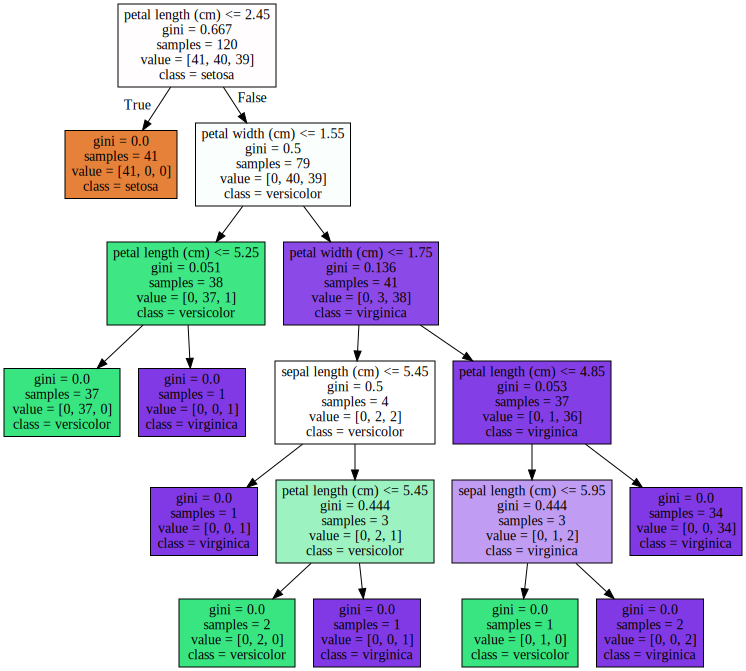

In [33]:
import graphviz

# 위에서 생성한 'tree.dot' 파일을 graphviz을 읽어서 쥬피터 노트북 상에 보여줌

with open('tree.dot') as f:
    dot_graph=f.read()

    
graphviz.Source(dot_graph)

# Feature 중요도 확인

feature importance: 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


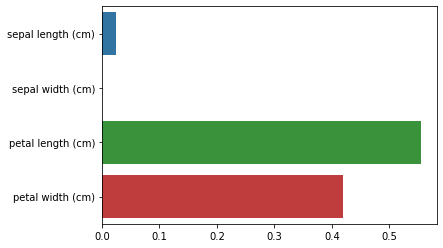

In [42]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance (학습을 위해 중요한 feature)추출

print('feature importance: \n{0}'.format(np.round(df_clf.feature_importances_,3)))

# feature 별 importance 표시

for name, value in zip(iris_data.feature_names, df_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance를 feature별로 bar 시각화

sns.barplot(x=df_clf.feature_importances_, y=iris_data.feature_names)

## 결정 트리 과적합

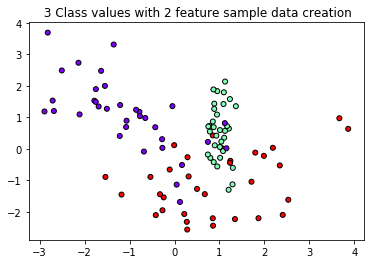

In [50]:
from sklearn.datasets import make_classification # 조건에 맞는 샘플데이터 생성
import matplotlib.pyplot as plt
plt.title(" 3 Class values with 2 feature sample data creation")

# 2차원 시각화를 할건데, feature는 2개, 결정할 클래스는 3가지 유형의 분류-> 샘플 생성

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                   n_clusters_per_class=1, random_state=0)

# 위에서 생성한 데이터를 스캐터 플랏으로 시각화
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, 
            cmap='rainbow', edgecolor='k')

In [60]:
import numpy as np

In [55]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

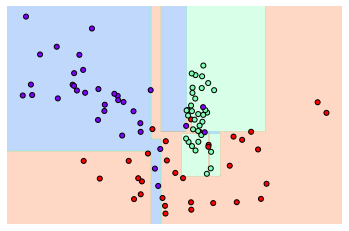

In [61]:
from sklearn.tree import DecisionTreeClassifier

df_clf

visualize_boundary(df_clf, X_features, y_labels)

## 트리생성에 참여한 파라미터 부여(min_samples_leaf=6)

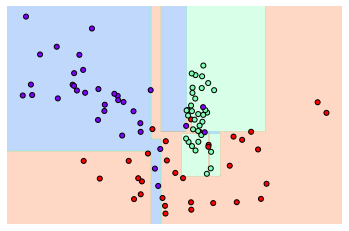

In [65]:
DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(df_clf, X_features, y_labels)

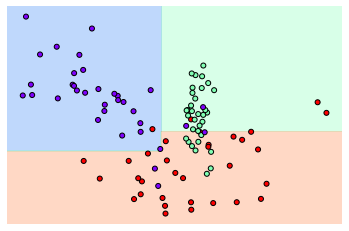

In [67]:
visualize_boundary(DecisionTreeClassifier(max_depth=2).fit(X_features, y_labels)
, X_features, y_labels)